# Q11 & Q12 - SLR without Intercept
_Ch 03 - Linear Regression  
Q11 , Q12 (applied)_

Simple linear regression without an intercept.

<a id='index'></a>
### Index
- [Load packages](#Load-packages)
- [Q11](#Q11)
    - [Simulate data](#Simulate-data)
    - [a) y ~ x, SLR without intercept](#a%29-y-~-x,-SLR-without-intercept)
    - [b) x ~ y, SLR without intercept](#b%29-x-~-y,-SLR-without-intercept)
    - [c) Relation between a and b](#c%29-Relation-between-a-and-b)
    - [d) t statistic for y ~ x + 0](#d%29-t-statistic-for-y-~-x-+-0)
    - [e) t-statistic equality in reverse regression](#e%29-t-statistic-equality-in-reverse-regression)
    - [f) t-statistic for models with intercepts](#f%29-t-statistic-for-models-with-intercepts)
- [Q12](#Q12)
    - [a) Circumstances for equal coefficients in reverse regression](#a%29-Circumstances-for-equal-coefficients-in-reverse-regression)
    - [b) Simulate data where coefficient of reverse regression is not equal](#b%29-Simulate-data-where-coefficient-of-reverse-regression-is-not-equal)
    - [c) Simulate data where coefficient of reverse regression is equal](#c%29-Simulate-data-where-coefficient-of-reverse-regression-is-equal)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
sns.set_style(rc={'axes_facecolor':'w', 'figure.facecolor':'w'})

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## Q11

### Simulate data
To begin, we generate a predictor x and a response y as follows.

In [3]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

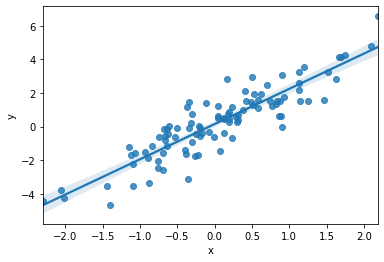

In [4]:
df = pd.DataFrame({'x':x, 'y':y})
sns.regplot(x='x', y='y', data=df);

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### a) y ~ x, SLR without intercept
Perform a simple linear regression of y onto x, without an intercept. 
Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [5]:
# regression without intercept
reg1 = smf.ols('y ~ x + 0', data=df).fit()
reg1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                    3.46e-36
Time:                        05:16:22   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,2.1067,0.106,19.792,0.000,1.896,2.318


<div class="alert alert-block alert-info">
    <b>$\hat{\beta}$</b><br>
    We simulated y using 2x + e, the model has slightly over-estimated the coefficient for x at &nbsp; $\hat{\beta} = 2.1067$ but the true $\beta$ falls within the confidence interval.<br><br>
    <b>Standard Error of the fit</b> = 0.106<br>
    $$S_{b_1} = \frac{S_{YX}}{\sqrt{SSX}}$$<br>
    where, 
    $$
    \begin{align*}
        S_{YX} &= \sqrt{\frac{SSE}{n-2}} \\
        SSE &= \sum{(y - \hat{y})^2} \\
        SSX &= \sum{(x - \bar{x})^2}
    \end{align*}
    $$
    <b>$S_{YX}$&nbsp; or SE of the estimate</b> measures the variability of the observed y values from the predicted y values. It is measured in the same units as the dependent variable Y.<br>
    So, in a way, std error of the fit states average variability around $y - \hat{y}$ as a fraction of average variation in x around its mean.<br><br>
    <b>t test</b><br>
    Testing the $H_0$ that there is no relationship between the variations of x and y, we got a t stat of 19.792 and a p-value ~ 0. Which means, we can reject the hypothesis of no relationship between y and x.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) x ~ y, SLR without intercept

In [7]:
reg2 = smf.ols('x ~ y+0', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                    3.46e-36
Time:                        05:16:22   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
reg2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,0.3789,0.019,19.792,0.000,0.341,0.417


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Relation between a and b
What is the relationship between the results obtained in (a) and (b)?

In [9]:
reg1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,2.1067,0.106,19.792,0.000,1.896,2.318


In [10]:
reg2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,0.3789,0.019,19.792,0.000,0.341,0.417


<div class="alert alert-block alert-info">
We can see that the t-stat for both regressions is the same and the coefficient estimates or slopes of the lines are not inversely proportional, i.e. &nbsp; $\hat{\beta}_y \ne 1 / \hat{\beta}_x$<br><br>
The forms that the relation between x and y takes are: 
    $$ y = 2 x + \epsilon $$
    $$ x = \frac{y - \epsilon}{2} $$
The reason for the misalignment in the two slopes is that the method for estimation of slopes, oridinary least squares, is working on minimizing two different loss functions.<br>
In case of $y ~ x$, ols derives slope by minimizing $\sum{(y - \hat{y})^2}$<br>
In case of $x ~ y$, ols derives slope by minimizing $\sum{(x - \hat{x})^2}$<br>
<br>Three sources expounding on this topic :<br>
    - <a href="https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions#c-reverse-regression-reversing-x-and-y---comparing-results">1</a> , <a href="https://botlnec.github.io/islp/sols/chapter3/exercise11/">2</a> , <a href="https://stats.stackexchange.com/questions/20553/effect-of-switching-response-and-explanatory-variable-in-simple-linear-regressio/20560#20560">3</a>
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) t statistic for y ~ x + 0
For the regression of Y onto X without an intercept, the t-statistic for $H_0 : \beta = 0$ takes the form &ensp; 

$$t = \frac{\hat\beta}{SE(\hat\beta)}$$  
where (<b>formulas for regression without intercept</b>)
$$\hat\beta = \left(\sum_{i=1}^{n} x_{i} y_{i}\right) /\left(\sum_{i^{\prime}=1}^{n} x_{i^{\prime}}^{2}\right)$$

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^{n}\left(y_{i}-x_{i} \hat{\beta}\right)^{2}}{(n-1) \sum_{i^{\prime}=1}^{n} x_{i^{\prime}}^{2}}}$$

(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.)
Show algebraically, and confirm numerically, that the t-statistic can be written as

$$\frac{(\sqrt{n-1}) \sum_{i=1}^{n} x_{i} y_{i}}{\sqrt{\left(\sum_{i=1}^{n} x_{i}^{2}\right)\left(\sum_{i^{\prime}=1}^{n} y_{i^{\prime}}^{2}\right)-\left(\sum_{i^{\prime}=1}^{n} x_{i^{\prime}} y_{i^{\prime}}\right)^{2}}}$$

<b>Answer:</b><br>


<b>Part (a):</b> Show algebraically<br>
[Help source: Liam Morgan](https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions#d-algebra-involving-the-t-statistic-no-intercept)

To show
$$
t = \frac{\hat\beta}{SE(\hat\beta)} = \frac {\sqrt{n-1} \sum{x y}} {\sqrt{(\sum{x^2})(\sum{y^2}) - (\sum{x y})^2}}
$$

<br><br>
$$ \hat\beta = \frac{\sum{xy}}{\sum{x^2}} \quad \leftarrow (1) $$


Simplifying $SE(\hat\beta)$:
$$ SE(\hat\beta) = \sqrt{\frac{\sum{(y - x \hat{\beta})^2}}{(n-1) \sum{x^2}}} $$

Numerator of $SE(\hat\beta)$
$$
\begin{align*}
\sum{(y - x \hat{\beta})^2} 
&= \sum{( y^2 + \hat{\beta}^2 x^2 - 2 y \hat{\beta} x )} \\
&= \sum{y^2} + \hat{\beta}^2 \sum{x^2} - 2\hat\beta \sum{xy} \\
&= \sum{y^2} + \left( \frac{\sum{xy}}{\sum{x^2}} \right)^2 \sum{x^2} - 2 \left( \frac{\sum{xy}}{\sum{x^2}} \right) \sum{xy} && \text{(from 1)} \\
&= \sum{y^2} +  \left( \frac{(\sum{xy})^2}{\sum{x^2}} \right) - 2 \left( \frac{(\sum{xy})^2}{\sum{x^2}} \right) \\
&= \sum{y^2} - \frac{(\sum{xy})^2}{\sum{x^2}} \\
&= \frac{\sum{x^2}\sum{y^2} - (\sum{xy})^2} {\sum{x^2}} && \leftarrow (2)
\end{align*}
$$

Putting simplified numerator from (2) in SE and simplifying further
$$ SE(\hat\beta) = \frac{1}{\sum{x^2}} \sqrt{\frac{\sum{x^2}\sum{y^2} - (\sum{xy})^2}{(n-1)}} \quad \leftarrow (3) $$

$$
\begin{align*}
t &= \frac{\hat\beta}{SE(\hat\beta)} = \frac{\frac{\sum{xy}}{\sum{x^2}}}{\frac{1}{\sum{x^2}} \sqrt{\frac{\sum{x^2}\sum{y^2} - (\sum{xy})^2}{(n-1)}}} \\
t &= \frac {\sqrt{n-1} \sum{x y}} {\sqrt{(\sum{x^2})(\sum{y^2}) - (\sum{x y})^2}}
\end{align*}
$$

<br><br>
<b>Part (b):</b> Confirming numerically<br>
Solving for 
$$\frac{(\sqrt{n-1}) \sum_{i=1}^{n} x_{i} y_{i}}{\sqrt{\left(\sum_{i=1}^{n} x_{i}^{2}\right)\left(\sum_{i^{\prime}=1}^{n} y_{i^{\prime}}^{2}\right)-\left(\sum_{i^{\prime}=1}^{n} x_{i^{\prime}} y_{i^{\prime}}\right)^{2}}}$$
with the values of &nbsp; $y\ \sim\ x + 0$ &nbsp; model

In [11]:
(np.sqrt(len(y) - 1) * sum(x*y)) / np.sqrt((sum(x**2)*sum(y**2)) - (sum(x*y)**2))

19.791801987091272

In [12]:
reg1.tvalues

x    19.791802
dtype: float64

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### e) t-statistic equality in reverse regression
Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

<b>Answer:</b><br>
The formula 
$$\frac{(\sqrt{n-1}) \sum_{i=1}^{n} x_{i} y_{i}}{\sqrt{\left(\sum_{i=1}^{n} x_{i}^{2}\right)\left(\sum_{i^{\prime}=1}^{n} y_{i^{\prime}}^{2}\right)-\left(\sum_{i^{\prime}=1}^{n} x_{i^{\prime}} y_{i^{\prime}}\right)^{2}}}$$

can be applied to $x \sim y + 0$ model without any change in the figures and thus will give the same result as for $y \sim x + 0$. So, the t-value will be the same for both models.

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### f) t-statistic for models with intercepts
Show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta_1 = 0$ is the same for the regression of y onto x as it is for the regression of x onto y.

In [13]:
reg3 = smf.ols('y ~ x', data=df).fit()
reg4 = smf.ols('x ~ y', data=df).fit()

In [14]:
reg3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1470,0.094,1.564,0.121,-0.039,0.334
x,2.0954,0.106,19.783,0.000,1.885,2.306


In [15]:
reg4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0440,0.040,-1.090,0.279,-0.124,0.036
y,0.3817,0.019,19.783,0.000,0.343,0.420


In [16]:
reg3.tvalues

Intercept     1.564347
x            19.782585
dtype: float64

In [17]:
reg4.tvalues

Intercept    -1.089559
y            19.782585
dtype: float64

In [18]:
reg3.tvalues[1].round(8) == reg4.tvalues[1].round(8)

True

The t-values for predictor are the same in both models.

[go to toc](#index)

<div align="center"><b>==============================================================================================================</b></div>

## Q12
This problem involves simple linear regression without an intercept.

### a) Circumstances for equal coefficients in reverse regression
a) Recall that the coefficient estimate $\hat\beta$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

$$ (3.38) \rightarrow \quad \hat\beta = \frac{\sum{xy}}{\sum{x^2}} $$

<b>Answer:</b><br>
$$
\hat\beta_{x} = \frac{\sum{xy}}{\sum{x^2}} 
\quad \text{and} \quad
\hat\beta_{y} = \frac{\sum{xy}}{\sum{y^2}}
$$
The two coefficients will be the same when
$$\sum{x^2} = \sum{y^2}$$

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Simulate data where coefficient of reverse regression is not equal
Generate an example with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

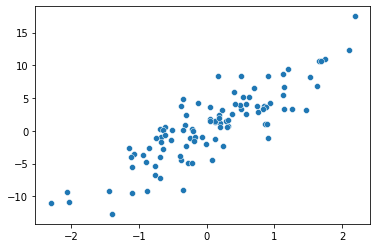

In [19]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 5 * x + np.random.normal(size=100, scale=3)
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

In [20]:
reg1 = smf.ols('y ~ x + 0', data=df).fit()
reg2 = smf.ols('x ~ y + 0', data=df).fit()

In [21]:
reg1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,5.3202,0.319,16.660,0.000,4.687,5.954


In [22]:
reg2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,0.1385,0.008,16.660,0.000,0.122,0.155


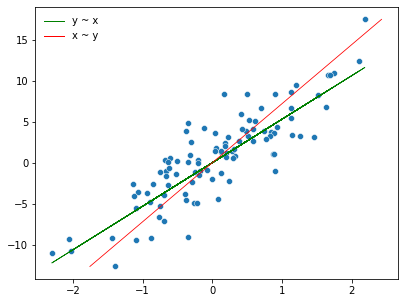

In [23]:
f, axs = plt.subplots(1,1, figsize=(6.5,5))
sns.scatterplot(x=x, y=y)
plt.plot(x, reg1.fittedvalues, lw=0.8, color='g')
ycords = np.linspace(min(y), max(y), len(y))
plt.plot(reg2.predict(exog=dict(y=ycords)), ycords, color='r', lw=0.8);
# axs.axline((min(x), reg1.predict(exog=dict(x=min(x)))[0]), slope=reg1.params[0], color='g', lw=0.8);
# axs.axline((reg2.predict(exog=dict(y=min(y)))[0], min(y)), slope=1/reg2.params[0], color='r', lw=0.8);

## Legend
from matplotlib.lines import Line2D
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-', marker=None) for c in ['g', 'r']]
labels = ['y ~ x', 'x ~ y']
plt.legend(lines, labels, loc='upper left', frameon=False);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Simulate data where coefficient of reverse regression is equal
Generate an example with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the <b>same</b> as the coefficient estimate for the regression of Y onto X

<b>Answer:</b><br>
There can be three scenrios where
$$
\hat\beta_{x} = \frac{\sum{xy}}{\sum{x^2}} 
\quad = \quad
\hat\beta_{y} = \frac{\sum{xy}}{\sum{y^2}}
$$
1) y = x<br>
2) y = -x<br>
3) y = |x|<br>
3) y is a permutation of x<br>

#### y is a permutation of x

xy = 961701, x^2 = 1230823, y^2=1230823
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.7813      0.063     12.457      0.000       0.657       0.906
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.7813      0.063     12.457      0.000       0.657       0.906


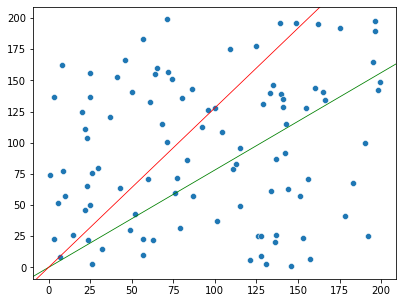

In [24]:
np.random.seed(1)
x = np.random.randint(200, size=100)
y = np.random.permutation(x)
df = pd.DataFrame({'x': x, 'y': y})

print(f'xy = {sum(x*y)}, x^2 = {sum(x**2)}, y^2={sum(y**2)}')

reg3 = smf.ols('y ~ x + 0', data=df).fit()
reg4 = smf.ols('x ~ y + 0', data=df).fit()

print(reg3.summary().tables[1])
print(reg4.summary().tables[1])

f, axs = plt.subplots(1,1, figsize=(6.5,5))
sns.scatterplot(x=x, y=y)
axs.axline((min(x), reg3.predict(exog=dict(x=min(x)))[0]), slope=reg3.params[0], color='g', lw=0.8);
axs.axline((reg4.predict(exog=dict(y=min(y)))[0], min(y)), slope=1/reg4.params[0], color='r', lw=0.8);

In [25]:
abs(np.random.normal(loc=0, size=3))

array([0.40349164, 0.59357852, 1.09491185])

#### y = |x|

xy = 9.670216925531115, x^2 = 78.71718048502926, y^2=78.71718048502926
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.1228      0.100      1.232      0.221      -0.075       0.321
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.1228      0.100      1.232      0.221      -0.075       0.321


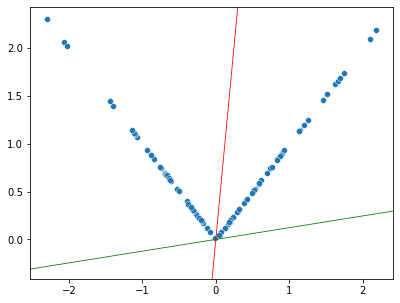

In [26]:
np.random.seed(1)
x = np.random.normal(loc=0, size=100)
y = abs(x)
df = pd.DataFrame({'x': x, 'y': y})

print(f'xy = {sum(x*y)}, x^2 = {sum(x**2)}, y^2={sum(y**2)}')

reg3 = smf.ols('y ~ x + 0', data=df).fit()
reg4 = smf.ols('x ~ y + 0', data=df).fit()

print(reg3.summary().tables[1])
print(reg4.summary().tables[1])

f, axs = plt.subplots(1,1, figsize=(6.5,5))
sns.scatterplot(x=x, y=y)
axs.axline((min(x), reg3.predict(exog=dict(x=min(x)))[0]), slope=reg3.params[0], color='g', lw=0.8);
axs.axline((reg4.predict(exog=dict(y=min(y)))[0], min(y)), slope=1/reg4.params[0], color='r', lw=0.8);

#### y = -x

xy = -1230823, x^2 = 1230823, y^2=1230823
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             -1.0000   3.56e-17  -2.81e+16      0.000      -1.000      -1.000
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y             -1.0000   3.56e-17  -2.81e+16      0.000      -1.000      -1.000


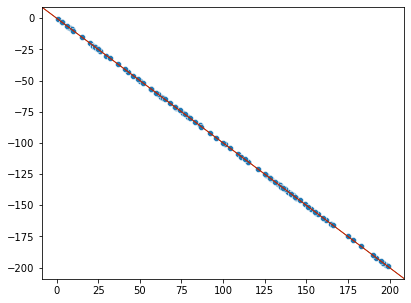

In [27]:
np.random.seed(1)
x = np.random.randint(200, size=100)
y = -x
df = pd.DataFrame({'x': x, 'y': y})

print(f'xy = {sum(x*y)}, x^2 = {sum(x**2)}, y^2={sum(y**2)}')

reg3 = smf.ols('y ~ x + 0', data=df).fit()
reg4 = smf.ols('x ~ y + 0', data=df).fit()

print(reg3.summary().tables[1])
print(reg4.summary().tables[1])

f, axs = plt.subplots(1,1, figsize=(6.5,5))
sns.scatterplot(x=x, y=y)
axs.axline((min(x), reg3.predict(exog=dict(x=min(x)))[0]), slope=reg3.params[0], color='g', lw=0.8);
axs.axline((reg4.predict(exog=dict(y=min(y)))[0], min(y)), slope=1/reg4.params[0], color='r', lw=0.8);

#### y = x

xy = 1230823, x^2 = 1230823, y^2=1230823
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0000   3.56e-17   2.81e+16      0.000       1.000       1.000
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              1.0000   3.56e-17   2.81e+16      0.000       1.000       1.000


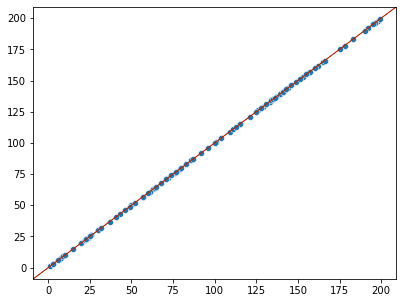

In [28]:
np.random.seed(1)
x = np.random.randint(200, size=100)
y = x
df = pd.DataFrame({'x': x, 'y': y})

print(f'xy = {sum(x*y)}, x^2 = {sum(x**2)}, y^2={sum(y**2)}')

reg3 = smf.ols('y ~ x + 0', data=df).fit()
reg4 = smf.ols('x ~ y + 0', data=df).fit()

print(reg3.summary().tables[1])
print(reg4.summary().tables[1])

f, axs = plt.subplots(1,1, figsize=(6.5,5))
sns.scatterplot(x=x, y=y)
axs.axline((min(x), reg3.predict(exog=dict(x=min(x)))[0]), slope=reg3.params[0], color='g', lw=0.8);
axs.axline((reg4.predict(exog=dict(y=min(y)))[0], min(y)), slope=1/reg4.params[0], color='r', lw=0.8);

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## References

https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions  
https://botlnec.github.io/islp/sols/chapter3/exercise11/

[go to toc](#index)

<b> &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b>